<h1>Simple Linear Regression</h1>

<h2>Import needed packages</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
289,2014,CHRYSLER,300 FFV,FULL-SIZE,3.6,6,A8,E,16.8,10.3,13.9,20,222
1043,2014,VOLKSWAGEN,PASSAT,MID-SIZE,1.8,4,A6,X,9.9,6.9,8.6,33,198
505,2014,HYUNDAI,ELANTRA GT,MID-SIZE,2.0,4,M6,X,9.8,7.0,8.5,33,196
1032,2014,VOLKSWAGEN,GOLF WAGON TDI CLEAN DIESEL,STATION WAGON - SMALL,2.0,4,A6,D,8.2,6.0,7.2,39,194
591,2014,JEEP,PATRIOT,SUV - SMALL,2.4,4,A6,X,11.1,8.3,9.8,29,225


<h2>Exploring the data</h2>

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<h3>Select features that might effect co2 emissions</h3>

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
51,5.2,10,17.8,409
616,1.6,4,7.7,177
400,2.0,4,8.9,205
201,2.0,4,7.1,192
896,4.8,8,13.7,315
484,3.5,6,9.1,209
710,2.5,4,7.7,177
207,2.4,4,10.0,230
444,5.3,8,21.5,344


<h3>Visualize Feature</h3>

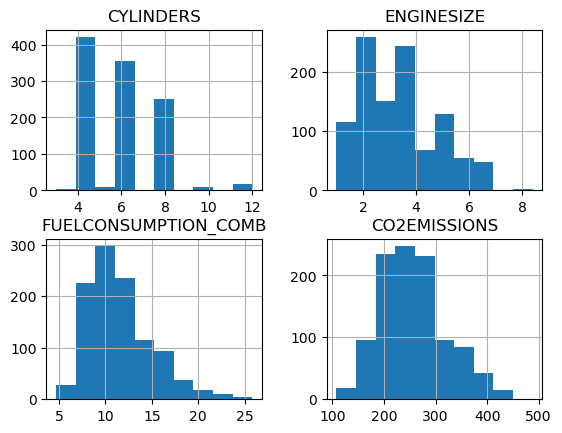

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

<h3>Displaying scatterplot of these features against co2 emission</h3>

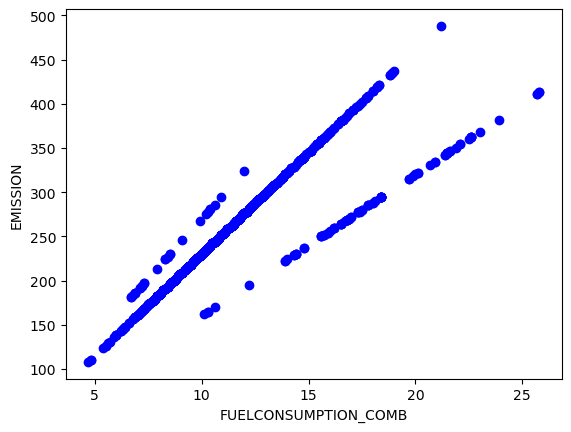

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('EMISSION')
plt.show()


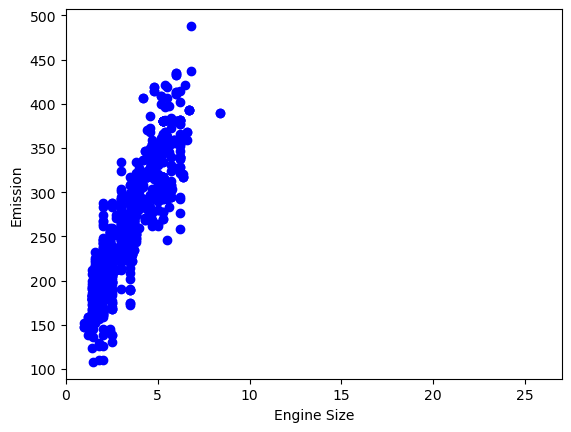

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.xlim(0,27)
plt.show()

<h3>Plotting Cylinder agaisnt Co2 Emission to see how linear the relationship is</h3>

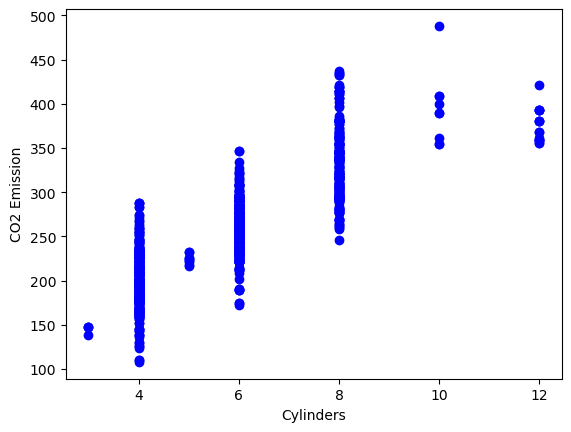

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,color ='blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission')
plt.show()

<h1>Extracting input feature and label from dataset to train and test datasets</h1>

In [18]:
X= cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

<h2>Creating and training dataset</h2>

<h3>Randomly splitting dataset </h3>

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

<h3>Cheking the type of train data</h3>

In [20]:
type(X_train),np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

<h1>Building a Simple Linear Regression Model using Train dataset</h1>

In [21]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

#Reshaping the X_train array as sklearn model needs a 2D array as input training data with shape
regressor.fit(X_train.reshape(-1,1),y_train)

print('Coefficients:', regressor.coef_[0])
print('Intercept:', regressor.intercept_)

Coefficients: 38.992978724434046
Intercept: 126.2897021740873


<h2>Visualize mdoel output </h2>

Text(0, 0.5, 'Emission')

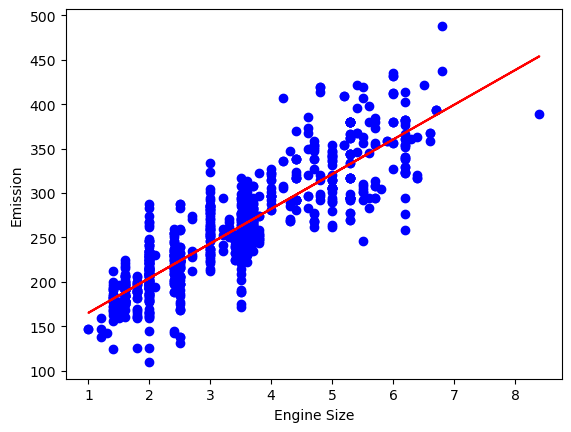

In [22]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.coef_ *X_train + regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

<h2>Model Evaluation</h2>

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test.reshape(-1,1))

print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
print('Root mean squared error : %.2f' % np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2-Score: %.2f' % r2_score(y_test,y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error : 31.40
R2-Score: 0.76


<h1>Building a simple Linear Regression Model using Test dataset<h1>

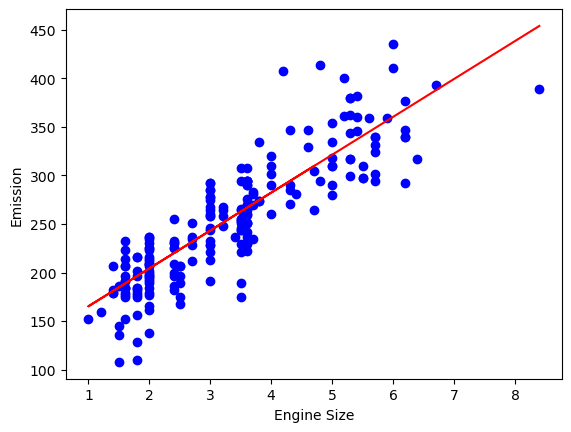

In [31]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

<h2>Splitting data into training and testing set</h2>

In [32]:
X= cdf.FUELCONSUMPTION_COMB.to_numpy()

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

<h2>Training linear regression model using training data</h2>

In [34]:
regr = linear_model.LinearRegression()

regr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

<h3>Using model to make test predictions on fuel consumption testing data</h3>

In [35]:
y_pred = regr.predict(X_test.reshape(-1,1))

<h3>Calculate and print Mean Squared Error of test predictions</h3>

In [36]:
print('Mean Squared Error : %f' % mean_squared_error(y_test,y_pred))

Mean Squared Error : 797.434631
